In [2]:
# #
# #importing the required libraries
# import cv2
# import numpy as np
# from keras.preprocessing import image
# from keras.models import model_from_json, load_model
# import face_recognition

# #loading the image to detect
# image_to_detect = cv2.imread('images/testing/trump-modi.jpg')

# #face_exp_model = model_from_json(open("dataset/facial_expression_model_structure.json","r",encoding="utf-8").read())
# #face_exp_model.load_weights('dataset/facial_expression_model_weights.h5')

# face_exp_model = load_model('dataset/facial_expression_model_combined.h5')

# #declare the emotions label
# emotions_label = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

# #detect all faces in the image
# #arguments are image,no_of_times_to_upsample, model
# all_face_locations = face_recognition.face_locations(image_to_detect,model='hog')

# #print the number of faces detected
# print('There are {} no of faces in this image'.format(len(all_face_locations)))

# #looping through the face locations
# for index,current_face_location in enumerate(all_face_locations):
#     #splitting the tuple to get the four position values of current face
#     top_pos,right_pos,bottom_pos,left_pos = current_face_location
#     #printing the location of current face
#     print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
#     #slicing the current face from main image
#     current_face_image = image_to_detect[top_pos:bottom_pos,left_pos:right_pos]
#     #draw rectangle around the face detected
#     cv2.rectangle(image_to_detect,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
    
#     #preprocess input, convert it to an image like as the data in dataset
#     #convert to grayscale
#     current_face_image = cv2.cvtColor(current_face_image, cv2.COLOR_BGR2GRAY) 
#     #resize to 48x48 px size
#     current_face_image = cv2.resize(current_face_image, (48, 48))
#     #convert the PIL image into a 3d numpy array
#     img_pixels = image.img_to_array(current_face_image)
#     #expand the shape of an array into single row multiple columns
#     img_pixels = np.expand_dims(img_pixels, axis = 0)
#     #pixels are in range of [0, 255]. normalize all pixels in scale of [0, 1]
#     img_pixels /= 255 
    
#     #do prodiction using model, get the prediction values for all 7 expressions
#     exp_predictions = face_exp_model.predict(img_pixels) 
#     #find max indexed prediction value (0 till 7)
#     max_index = np.argmax(exp_predictions[0])
#     #get corresponding lable from emotions_label
#     emotion_label = emotions_label[max_index]
    
#     #display the name as text in the image
#     font = cv2.FONT_HERSHEY_DUPLEX
#     cv2.putText(image_to_detect, emotion_label, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
# #showing the current face with rectangle drawn
# cv2.imshow("Image Face Emotions",image_to_detect)







Model loaded successfully!
There are 2 no of faces in this image
Found face 1 at top:56,right:275,bottom:146,left:185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Found face 2 at top:116,right:504,bottom:206,left:414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


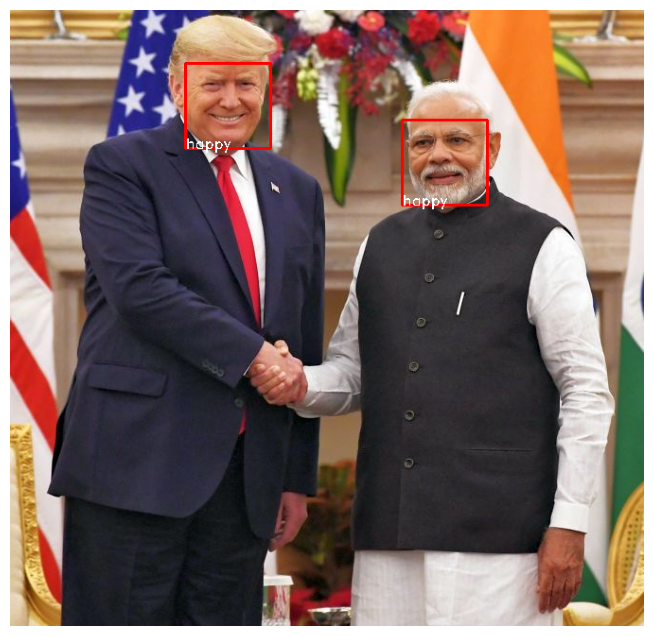

In [3]:
#
#importing the required libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import face_recognition
import matplotlib.pyplot as plt

#loading the image to detect
image_to_detect = cv2.imread('images/testing/trump-modi.jpg')

# Rebuild the model architecture manually (matches your JSON structure)
face_exp_model = Sequential()
face_exp_model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1), name='conv2d_1'))
face_exp_model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), name='max_pooling2d_1'))
face_exp_model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
face_exp_model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_3'))
face_exp_model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2), name='average_pooling2d_1'))
face_exp_model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_4'))
face_exp_model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_5'))
face_exp_model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2), name='average_pooling2d_2'))
face_exp_model.add(Flatten(name='flatten_1'))
face_exp_model.add(Dense(1024, activation='relu', name='dense_1'))
face_exp_model.add(Dropout(0.2, name='dropout_1'))
face_exp_model.add(Dense(1024, activation='relu', name='dense_2'))
face_exp_model.add(Dropout(0.2, name='dropout_2'))
face_exp_model.add(Dense(7, activation='softmax', name='dense_3'))

# Load only the weights
face_exp_model.load_weights('dataset/facial_expression_model_weights.h5')

print("Model loaded successfully!")

#declare the emotions label
emotions_label = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

#detect all faces in the image
#arguments are image,no_of_times_to_upsample, model
all_face_locations = face_recognition.face_locations(image_to_detect,model='hog')

#print the number of faces detected
print('There are {} no of faces in this image'.format(len(all_face_locations)))

#looping through the face locations
for index,current_face_location in enumerate(all_face_locations):
    #splitting the tuple to get the four position values of current face
    top_pos,right_pos,bottom_pos,left_pos = current_face_location
    #printing the location of current face
    print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
    #slicing the current face from main image
    current_face_image = image_to_detect[top_pos:bottom_pos,left_pos:right_pos]
    #draw rectangle around the face detected
    cv2.rectangle(image_to_detect,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
    
    #preprocess input, convert it to an image like as the data in dataset
    #convert to grayscale
    current_face_image = cv2.cvtColor(current_face_image, cv2.COLOR_BGR2GRAY) 
    #resize to 48x48 px size
    current_face_image = cv2.resize(current_face_image, (48, 48))
    #convert the PIL image into a 3d numpy array
    img_pixels = image.img_to_array(current_face_image)
    #expand the shape of an array into single row multiple columns
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    #pixels are in range of [0, 255]. normalize all pixels in scale of [0, 1]
    #img_pixels /= 255 
    
    #do prodiction using model, get the prediction values for all 7 expressions
    exp_predictions = face_exp_model.predict(img_pixels) 
    #find max indexed prediction value (0 till 7)
    max_index = np.argmax(exp_predictions[0])
    #get corresponding lable from emotions_label
    emotion_label = emotions_label[max_index]
    
    #display the name as text in the image
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image_to_detect, emotion_label, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
    
#showing the current face with rectangle drawn
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_to_detect, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#